In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from performance_indicator import *
from trading_computation import *
from plotting_computation import *

### Setting

In [19]:
# To evaluate trainset, set TRAIN = True, else, False
TRAIN = False
WINDOW = 30
INCREASE_RF = False

In [20]:
if TRAIN:
    file_keyword = 'TRAIN'
else:
    file_keyword = 'TEST'

if INCREASE_RF:
    ma = pd.read_csv(f'models_data/MA_RSI_{file_keyword}_RF.csv')
    macd = pd.read_csv(f'models_data/MACD_{file_keyword}_RF.csv')
    lstm = pd.read_csv(f'models_data/LSTM_{file_keyword}_RF.csv')
else:
    ma = pd.read_csv(f'models_data/MA_RSI_{file_keyword}.csv')
    macd = pd.read_csv(f'models_data/MACD_{file_keyword}.csv')
    lstm = pd.read_csv(f'models_data/LSTM_{file_keyword}.csv')
    
ma['Date'] = pd.to_datetime(ma['Date'])
macd['Date'] = pd.to_datetime(macd['Date'])
lstm['Date'] = pd.to_datetime(lstm['Date'])

### Check the volatility

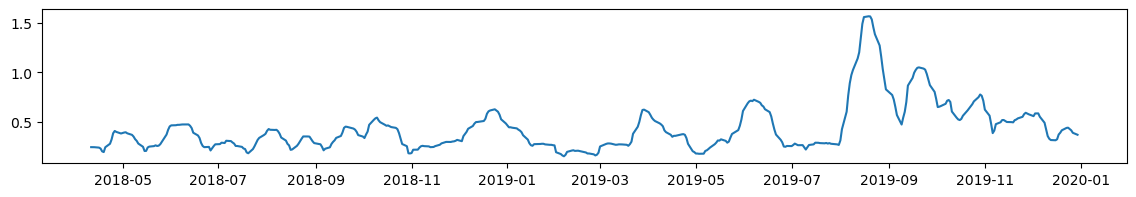

In [21]:
plt.figure(figsize=(14, 2))
price_std = ma['Close'].rolling(window = 20).std()
plt.plot(ma['Date'], price_std)

### Turnover Computation

Turnover in dollars: 12230681.547620036
Turnover in units: 234323.13592521846


/Users/chenkangan/Documents/UCL DSML/Algorithmic Trading/CW2/code/plotting_computation.py:189: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


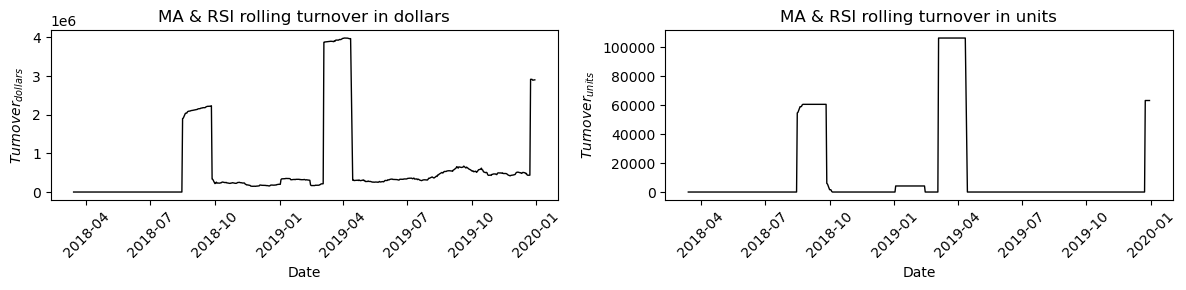

In [22]:
ma_turnover_dollar = calculate_rolling_turnover(theta = ma['theta'], 
                           price = ma['Close'], 
                           window_size = WINDOW,
                           mode = 'dollar')

ma_turnover_unit = calculate_rolling_turnover(theta = ma['theta'], 
                           price = ma['Close'], 
                           window_size = WINDOW,
                           mode = 'unit')

    
fig, ax = plot_turnover(ma, ma_turnover_dollar, ma_turnover_unit, mode = 'Rolling')
ax[0].set_title('MA & RSI rolling turnover in dollars')
ax[1].set_title('MA & RSI rolling turnover in units')

print(f"Turnover in dollars: {calculate_turnover(theta = ma['theta'], price = ma['Close'], mode = 'dollar')}")
print(f"Turnover in units: {calculate_turnover(theta = ma['theta'], price = ma['Close'], mode = 'unit')}")

Turnover in dollars: 262432380.56878597
Turnover in units: 6728297.158732334


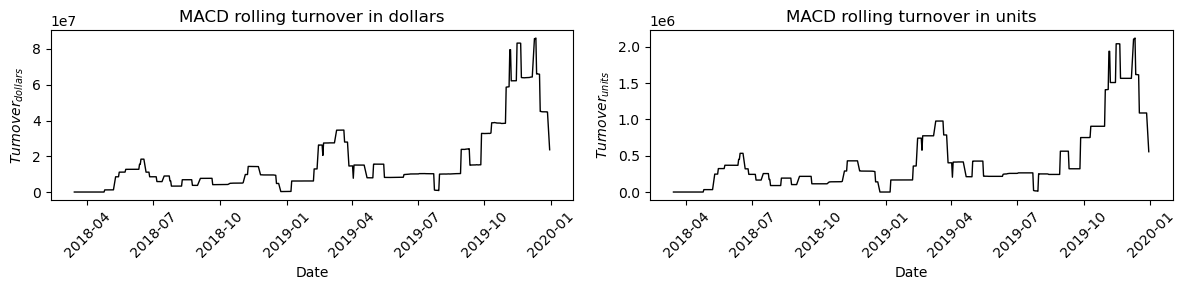

In [23]:
macd_turnover_dollar = calculate_rolling_turnover(theta = macd['theta'], 
                           price = macd['Close'], 
                           window_size = WINDOW,
                           mode = 'dollar')

macd_turnover_unit = calculate_rolling_turnover(theta = macd['theta'], 
                           price = macd['Close'], 
                           window_size = WINDOW,
                           mode = 'unit')

    
fig, ax = plot_turnover(macd, macd_turnover_dollar, macd_turnover_unit, mode = 'Rolling')
ax[0].set_title('MACD rolling turnover in dollars')
ax[1].set_title('MACD rolling turnover in units')
print(f"Turnover in dollars: {calculate_turnover(theta = macd['theta'], price = macd['Close'], mode = 'dollar')}")
print(f"Turnover in units: {calculate_turnover(theta = macd['theta'], price = macd['Close'], mode = 'unit')}")

Turnover in dollars: 59250576.10962362
Turnover in units: 1356763.9265981768


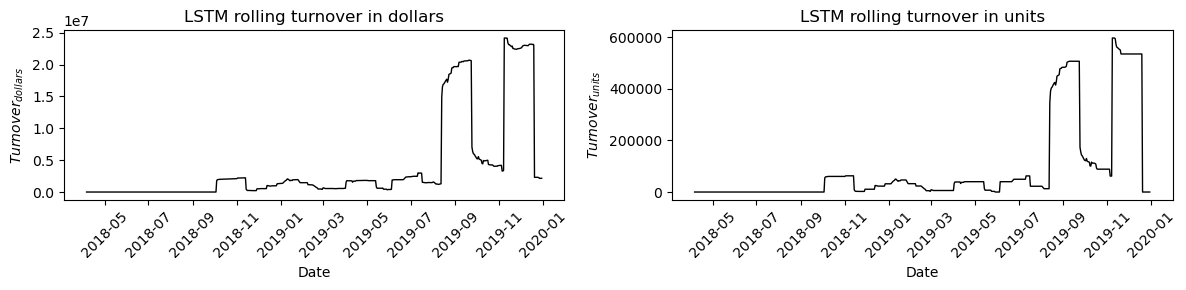

In [24]:
lstm_turnover_dollar = calculate_rolling_turnover(theta = lstm['theta'], 
                           price = lstm['Close'], 
                           window_size = WINDOW,
                           mode = 'dollar')

lstm_turnover_unit = calculate_rolling_turnover(theta = lstm['theta'], 
                           price = lstm['Close'], 
                           window_size = WINDOW,
                           mode = 'unit')

    
fig, ax = plot_turnover(lstm, lstm_turnover_dollar, lstm_turnover_unit, mode = 'Rolling')
ax[0].set_title('LSTM rolling turnover in dollars')
ax[1].set_title('LSTM rolling turnover in units')
print(f"Turnover in dollars: {calculate_turnover(theta = lstm['theta'], price = lstm['Close'], mode = 'dollar')}")
print(f"Turnover in units: {calculate_turnover(theta = lstm['theta'], price = lstm['Close'], mode = 'unit')}")

Text(0.5, 0, 'Date')

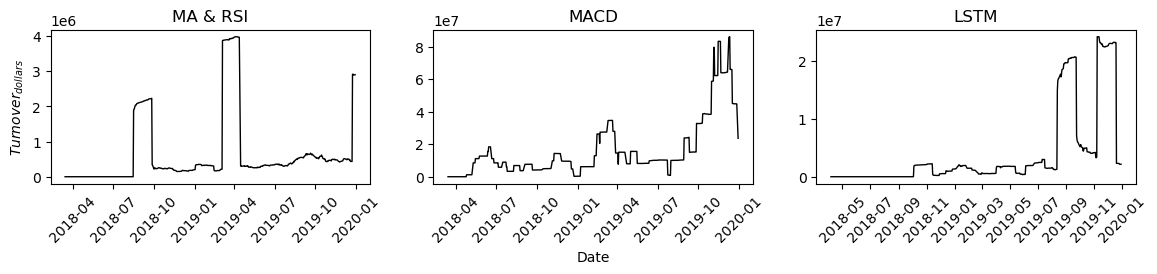

In [25]:
fig, ax = plt.subplots(1, 3, figsize = (14, 2))
ax[0].plot(ma['Date'], ma_turnover_dollar, lw = 1, color = 'black', label = 'MA & RSI model')
ax[1].plot(macd['Date'], macd_turnover_dollar, lw = 1, color = 'black', label = 'MACD model')
ax[2].plot(lstm['Date'], lstm_turnover_dollar, lw = 1, color = 'black', label = 'LSTM model')
ax[0].tick_params(axis = 'x', labelrotation=45)
ax[1].tick_params(axis = 'x', labelrotation=45)
ax[2].tick_params(axis = 'x', labelrotation=45)
ax[0].set_ylabel(r"$Turnover_{dollars}$")
ax[0].set_title(f'MA & RSI')
ax[1].set_title(f'MACD')
ax[2].set_title(f'LSTM')
ax[1].set_xlabel(r"Date")


In [26]:
def modified_plot_PnL(fig, ax, date, dV, dVcap, dVtot, label):
   
    # plot position on training set
    ax[0, 0].plot(date, dV, lw = 1, alpha = 1, label = label)
    ax[0, 0].set_xlabel('Time')
    ax[0, 0].set_ylabel(r'$\Delta V_t$')
    ax[0, 0].set_title('PnL in asset')
    ax[0, 0].grid(True)
    ax[0, 0].tick_params(axis = 'x',labelrotation=45)
    
    ax[0, 1].plot(date, dVcap, lw = 1, alpha = 1, label = label)
    ax[0, 1].set_title('PnL in unused capital')
    ax[0, 1].set_xlabel('Time')
    ax[0, 1].set_ylabel(r'$\Delta V_t^{cap}$')
    ax[0, 1].grid(True)
    ax[0, 1].tick_params(axis = 'x',labelrotation=45)
    
    ax[0, 2].plot(date, dVtot, lw = 1, alpha = 1, label = label)
    ax[0, 2].set_title('PnL in total capital')
    ax[0, 2].set_xlabel('Time')
    ax[0, 2].set_ylabel(r'$\Delta V_t^{total}$')
    ax[0, 2].grid(True)
    ax[0, 2].tick_params(axis = 'x',labelrotation=45)
    
    ax[1, 0].plot(date, np.cumsum(dV), lw = 1, alpha = 1, label = label)
    ax[1, 0].set_title('Cumulative PnL in asset')
    ax[1, 0].set_xlabel('Time')
    ax[1, 0].set_ylabel(r'Cumulative $\Delta V_t$')
    ax[1, 0].grid(True)
    ax[1, 0].tick_params(axis = 'x',labelrotation=45)
    
    ax[1, 1].plot(date, np.cumsum(dVcap), lw = 1, alpha = 1, label = label)
    ax[1, 1].set_title('Cumulative PnL in unused capital')
    ax[1, 1].set_xlabel('Time')
    ax[1, 1].set_ylabel(r'Cumulative $\Delta V_t^{cap}$')
    ax[1, 1].grid(True)
    ax[1, 1].tick_params(axis = 'x',labelrotation=45)
    
    ax[1, 2].plot(date, np.cumsum(dVtot), lw = 1, alpha = 1, label = label)
    ax[1, 2].set_title('Cumulative PnL in total capital')
    ax[1, 2].set_xlabel('Time')
    ax[1, 2].set_ylabel(r'Cumulative $\Delta V_t^{total}$')
    ax[1, 2].grid(True)
    ax[1, 2].tick_params(axis = 'x', labelrotation=45)

    fig.tight_layout()
    fig.show()

In [27]:
# Calculate final pnl
print(f"MA & RSI: {np.cumsum(np.array(ma['dVtot']))[-1]}")
print(f"MACD: {np.cumsum(np.array(macd['dVtot']))[-1]}")
print(f"LSTM: {np.cumsum(np.array(lstm['dVtot']))[-1]}")


MA & RSI: 325223.9223612107
MACD: 1746361.8593379715
LSTM: 1270093.8673312839


/var/folders/l5/2302s0j90898y2c73n3g1wmr0000gn/T/ipykernel_21965/2472899818.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


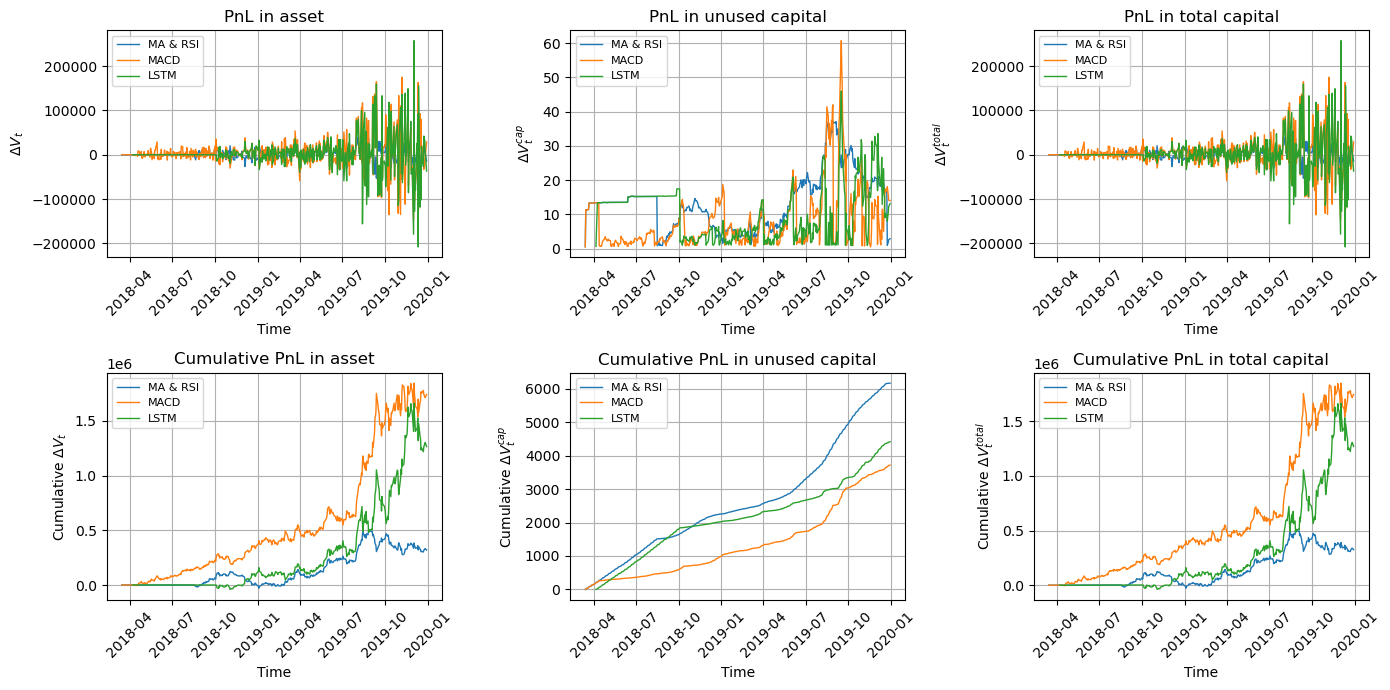

In [28]:
fig, ax = plt.subplots(2, 3, figsize = (14, 7))
modified_plot_PnL(fig, ax, date = ma['Date'], dV = ma['dV'], dVcap = ma['dVcap'], dVtot = ma['dVtot'], label = 'MA & RSI')
modified_plot_PnL(fig, ax, date = macd['Date'], dV = macd['dV'], dVcap = macd['dVcap'], dVtot = macd['dVtot'], label = 'MACD')
modified_plot_PnL(fig, ax, date = lstm['Date'], dV = lstm['dV'], dVcap = lstm['dVcap'], dVtot = lstm['dVtot'], label = 'LSTM')
ax[0, 0].legend(fontsize = 8)
ax[0, 1].legend(fontsize = 8)
ax[0, 2].legend(fontsize = 8)
ax[1, 0].legend(fontsize = 8)
ax[1, 1].legend(fontsize = 8)
ax[1, 2].legend(fontsize = 8)


### Performance indicator

In [29]:
def get_performance_indicator(df):
    excess_return = np.array(df['dV'] / df['V'])
    sr = compute_sharpe_ratio(excess_return)
    sortino = compute_sortino_ratio(excess_return)
    mdd = compute_max_drawdown(df['dV'], df['V'])
    cr = compute_calmar_ratio_modify(df['dV'], df['V'])
    
    print(f'Sharpe ratio: {round(sr, 5)}')
    print(f'Sortino ratio: {round(sortino, 5)}')
    print(f'Maximum drawdown: {round(mdd, 5)}')
    print(f'Calmar ratio: {round(cr, 5)}')
    print('-------------------')
    
    return [sr, sortino, mdd, cr]

print('MA & RSI')
get_performance_indicator(ma)
print('MACD')
get_performance_indicator(macd)
print('LSTM')
get_performance_indicator(lstm)

MA & RSI
Sharpe ratio: 0.9589
Sortino ratio: 1.32876
Maximum drawdown: -0.52381
Calmar ratio: 1.35565
-------------------
MACD
Sharpe ratio: 2.95121
Sortino ratio: 5.29987
Maximum drawdown: -0.21856
Calmar ratio: 9.45189
-------------------
LSTM
Sharpe ratio: 1.49914
Sortino ratio: 1.92036
Maximum drawdown: -0.43324
Calmar ratio: 3.50385
-------------------


[1.4991448955956197,
 1.9203574137140949,
 -0.4332432387893006,
 3.503846987868806]

/Users/chenkangan/Documents/UCL DSML/Algorithmic Trading/CW2/code/performance_indicator.py:40: RuntimeWarning: invalid value encountered in divide
  rolling_sr = rolling_mean / rolling_std * np.sqrt(window)
/Users/chenkangan/Documents/UCL DSML/Algorithmic Trading/CW2/code/performance_indicator.py:40: RuntimeWarning: invalid value encountered in divide
  rolling_sr = rolling_mean / rolling_std * np.sqrt(window)


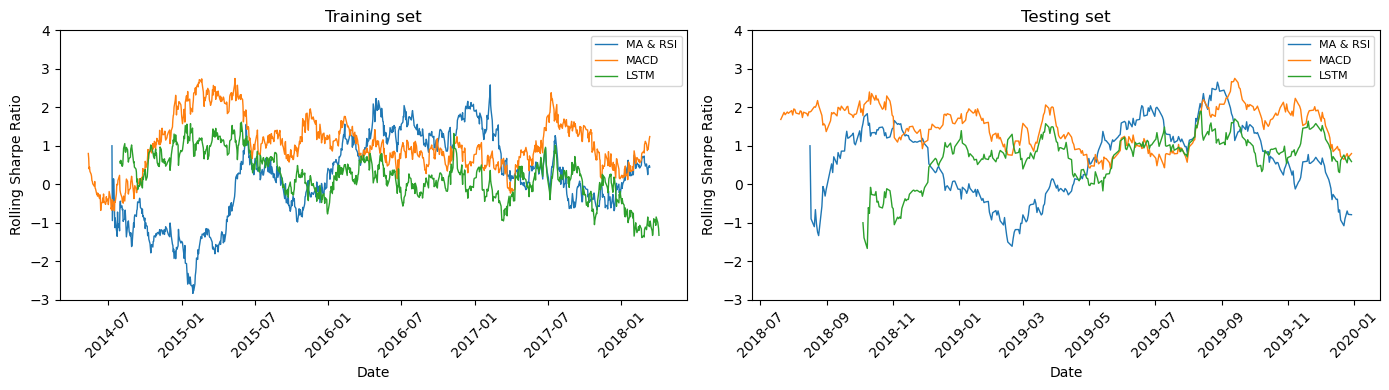

In [30]:

def plot_rolling_sr(fig, ax, model_name):
    
    df_train = pd.read_csv(f'models_data/{model_name}_TRAIN.csv')
    df_test = pd.read_csv(f'models_data/{model_name}_TEST.csv')
    if model_name == 'MA_RSI':
        label = 'MA & RSI'
    else:
        label = model_name
    
    df_train['Date'] = pd.to_datetime(df_train['Date'])
    df_test['Date'] = pd.to_datetime(df_test['Date'])
    df_train['return'] = df_train['dV'] / df_train['V']
    df_test['return'] = df_test['dV'] / df_test['V']
    rolling_sr_train = compute_rolling_sharpe_ratio(df_train['return'], window = 90)
    rolling_sr_test = compute_rolling_sharpe_ratio(df_test['return'], window = 90)
    ax[0].plot(df_train['Date'], rolling_sr_train, lw = 1, label = label)
    ax[0].tick_params(axis = 'x', labelrotation=45)
    ax[0].set_title('Training set')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Rolling Sharpe Ratio')
    ax[0].set_ylim(-3, 4)
    ax[0].legend(fontsize = 8, loc = 'upper right')
    ax[1].plot(df_test['Date'], rolling_sr_test, lw = 1, label = label)
    ax[1].set_title('Testing set')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Rolling Sharpe Ratio')
    ax[1].tick_params(axis = 'x', labelrotation=45)
    ax[1].legend(fontsize = 8, loc = 'upper right')
    ax[1].set_ylim(-3, 4)
    fig.tight_layout()
    
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
    
plot_rolling_sr(fig, ax, 'MA_RSI')
plot_rolling_sr(fig, ax, 'MACD')
plot_rolling_sr(fig, ax, 'LSTM')

### Explore if risk-free rate increases

In [31]:
ma = pd.read_csv('models_data/MACD_TRAIN.csv')
ma_rf = pd.read_csv('models_data/MACD_TRAIN_RF.csv')
ma['Date'] = pd.to_datetime(ma['Date'])
ma_rf['Date'] = pd.to_datetime(ma_rf['Date'])

/var/folders/l5/2302s0j90898y2c73n3g1wmr0000gn/T/ipykernel_21965/2472899818.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


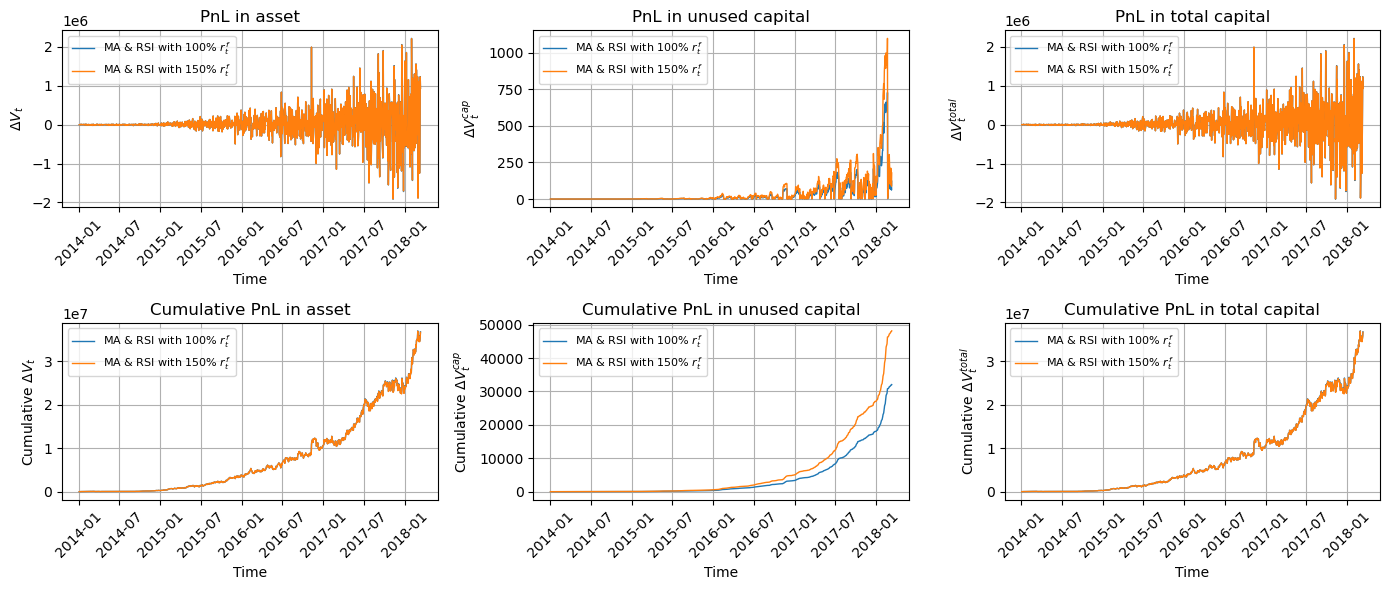

In [32]:
fig, ax = plt.subplots(2, 3, figsize = (14, 6))
modified_plot_PnL(fig, ax, date = ma['Date'], dV = ma['dV'], dVcap = ma['dVcap'], dVtot = ma['dVtot'], label = r'MA & RSI with 100% $r_t^f$')
modified_plot_PnL(fig, ax, date = ma_rf['Date'], dV = ma_rf['dV'], dVcap = ma_rf['dVcap'], dVtot = ma_rf['dVtot'], label = r'MA & RSI with 150% $r_t^f$')
ax[0, 0].legend(fontsize = 8)
ax[0, 1].legend(fontsize = 8)
ax[0, 2].legend(fontsize = 8)
ax[1, 0].legend(fontsize = 8)
ax[1, 1].legend(fontsize = 8)
ax[1, 2].legend(fontsize = 8)

In [33]:
# Calculate final pnl
print(f"PnL with 100% rf: {np.cumsum(np.array(ma['dVtot']))[-1]}")
print(f"PnL & RSI with 150% rf: {np.cumsum(np.array(ma_rf['dVtot']))[-1]}")
print(f"Percentage increase: {(np.cumsum(np.array(ma_rf['dVtot']))[-1]/np.cumsum(np.array(ma['dVtot']))[-1]-1)*100}%")


PnL with 100% rf: 36734603.42394743
PnL & RSI with 150% rf: 36628259.891316846
Percentage increase: -0.2894914405452864%


### Drawdown Analysis

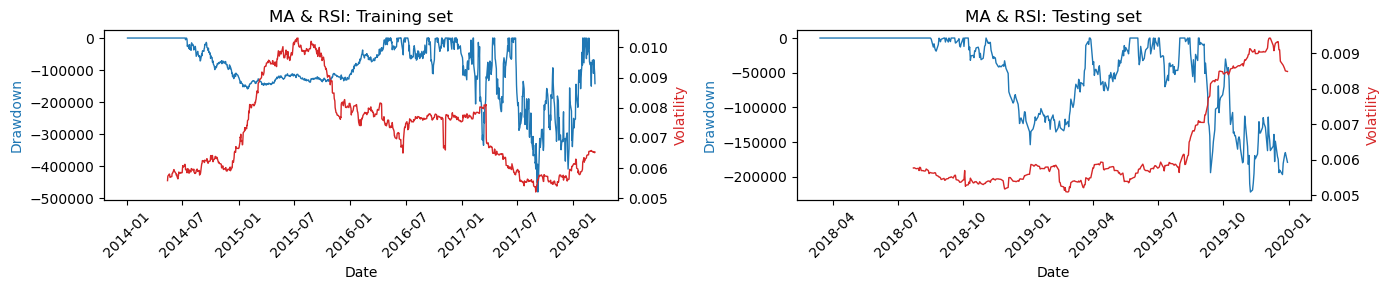

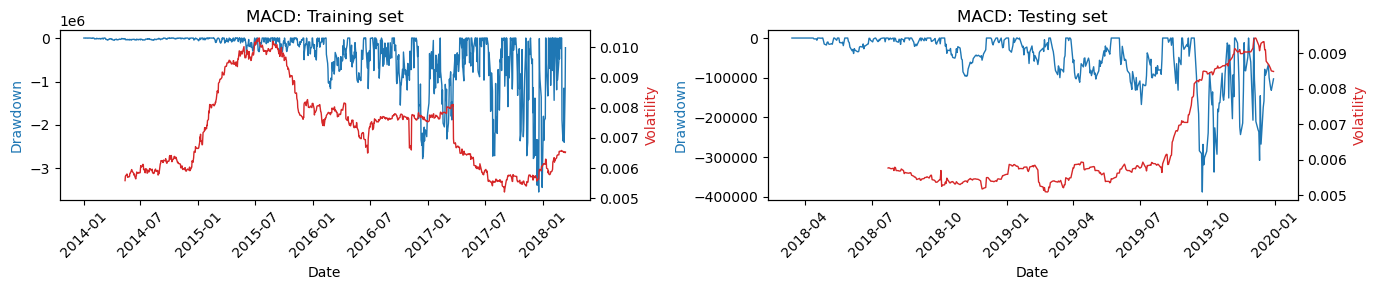

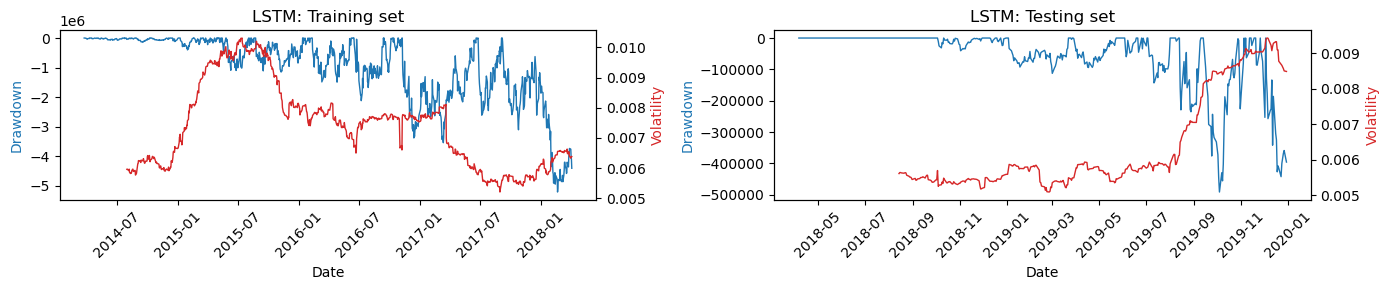

In [34]:

def compute_drawdown_pnl(pnl_series: np.ndarray) -> np.ndarray:
    """
    Calculate the drawdown of a PnL series.

    Parameters:
    pnl_series (np.ndarray): An array of cumulative profits and losses.

    Returns:
    np.ndarray: An array of drawdown values.
    """
    # Calculate the cumulative maximum of the PnL series up to each point
    running_max = np.maximum.accumulate(pnl_series)
    # Calculate drawdown
    drawdown = -(running_max - pnl_series)

    return drawdown   

def plot_drawdown(model_name):
        
    fig, ax = plt.subplots(1, 2, figsize = (14, 3))
    df_train = pd.read_csv(f'models_data/{model_name}_TRAIN.csv')
    df_test = pd.read_csv(f'models_data/{model_name}_TEST.csv')
    if model_name == 'MA_RSI':
        label = 'MA & RSI'
    else:
        label = model_name
    
    df_train['Date'] = pd.to_datetime(df_train['Date'])
    df_test['Date'] = pd.to_datetime(df_test['Date'])
    dd_train = compute_drawdown_pnl(np.cumsum(df_train['dVtot']))
    dd_test = compute_drawdown_pnl(np.cumsum(df_test['dVtot']))
    ax[0].plot(df_train['Date'], dd_train, lw = 1, color = 'tab:blue', label = 'Drawdown')
    ax[0].tick_params(axis = 'x', labelrotation=45)
    ax[0].set_title(f'{label}: Training set')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Drawdown', color = 'tab:blue')
    # ax[0].legend(fontsize = 8, loc = 'upper right')
    ax[1].plot(df_test['Date'], dd_test, lw = 1, color = 'tab:blue', label = 'Drawdown')
    ax[1].set_title(f'{label}: Testing set')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Drawdown', color = 'tab:blue')
    ax[1].tick_params(axis = 'x', labelrotation=45)
    # ax[1].legend(fontsize = 8, loc = 'upper right')
    
    # Calculate daily returns
    daily_returns_train = df_train['Close'].pct_change()
    daily_returns_test = df_test['Close'].pct_change()

    # Calculate the 90-day rolling standard deviation of returns (volatility)
    rolling_volatility_train = daily_returns_train.rolling(window=90).std()
    rolling_volatility_test = daily_returns_test.rolling(window=90).std()
    
    ax1 = ax[0].twinx()
    ax2 = ax[1].twinx()
    ax1.plot(df_train['Date'], rolling_volatility_train, color = 'tab:red', lw = 1, label = 'Volatility')
    # ax1.tick_params(axis = 'x', labelrotation=45)
    # ax1.set_title(f'{label}: Training set')
    # ax1.set_xlabel('Date')
    ax1.set_ylabel('Volatility', color = 'tab:red')
    
    ax2.plot(df_test['Date'], rolling_volatility_test, color = 'tab:red', lw = 1, label = 'Volatility')
    # ax2.set_title(f'{label}: Testing set')
    # ax2.set_xlabel('Date')
    ax2.set_ylabel('Volatility', color = 'tab:red')
    # ax2.tick_params(axis = 'x', labelrotation=45)    
    fig.tight_layout()
    
    
plot_drawdown('MA_RSI')
plot_drawdown('MACD')
plot_drawdown('LSTM')